In [1]:
import pandas as pd
df = pd.read_csv('/Users/ibb4n/Downloads/house_price_data/housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [2]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [3]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [8]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7007 - accuracy: 0.4746 - val_loss: 0.6911 - val_accuracy: 0.5753
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5920 - val_loss: 0.6873 - val_accuracy: 0.6393
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6252 - val_loss: 0.6837 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.6096 - val_loss: 0.6796 - val_accuracy: 0.5662
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6301 - val_loss: 0.6754 - val_accuracy: 0.5799
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6637 - accuracy: 0.6331 - val_loss: 0.6708 - val_accuracy: 0.5982
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.6634 - val_loss: 0.6660 - val_accuracy: 0.6210
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8787 - val_loss: 0.3803 - val_accuracy: 0.8402
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8787 - val_loss: 0.3803 - val_accuracy: 0.8402
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8806 - val_loss: 0.3802 - val_accuracy: 0.8402
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8806 - val_loss: 0.3769 - val_accuracy: 0.8402
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8787 - val_loss: 0.3760 - val_accuracy: 0.8402
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8806 - val_loss: 0.3757 - val_accuracy: 0.8402
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8796 - val_loss: 0.3737 - val_accuracy: 0.8402
Epoch 

In [10]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.9041


0.9041095972061157

In [11]:
import matplotlib.pyplot as plt

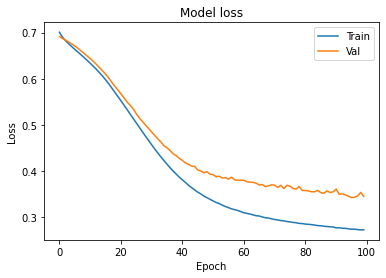

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

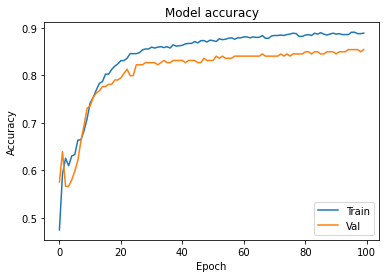

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [15]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 0.4614 - accuracy: 0.8014 - val_loss: 0.3873 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3644 - accuracy: 0.8464 - val_loss: 0.3697 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2934 - accuracy: 0.8738 - val_loss: 0.3739 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3095 - accuracy: 0.8806 - val_loss: 0.3199 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2699 - accuracy: 0.8826 - val_loss: 0.3165 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2412 - accuracy: 0.9022 - val_loss: 0.3013 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2929 - accuracy: 0.8699 - val_loss: 0.2926 - val_accuracy: 0.8813
Epoch 

32/32 [==============================] - 1s 31ms/step - loss: 0.1567 - accuracy: 0.9266 - val_loss: 0.3501 - val_accuracy: 0.8950
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1482 - accuracy: 0.9335 - val_loss: 0.3409 - val_accuracy: 0.9315
Epoch 60/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1600 - accuracy: 0.9374 - val_loss: 0.3236 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1544 - accuracy: 0.9384 - val_loss: 0.3473 - val_accuracy: 0.9132
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1634 - accuracy: 0.9325 - val_loss: 0.3521 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1480 - accuracy: 0.9374 - val_loss: 0.3805 - val_accuracy: 0.9041
Epoch 64/100
32/32 [==============================] - 1s 31ms/step - loss: 0.1609 - accuracy: 0.9315 - val_loss: 0.3320 - val_accuracy: 0.8950
Epoch 65/100

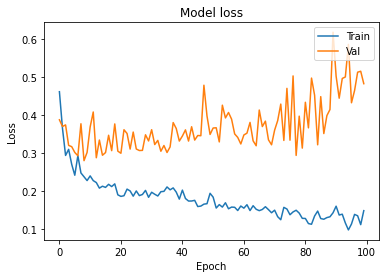

In [17]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

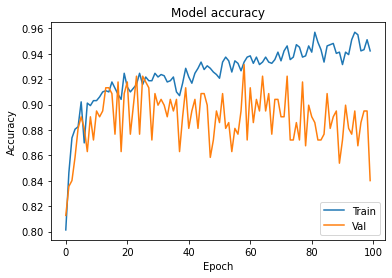

In [18]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [20]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [21]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 52ms/step - loss: 14.2179 - accuracy: 0.6125 - val_loss: 3.9113 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 1.6651 - accuracy: 0.8317 - val_loss: 0.7036 - val_accuracy: 0.8174
Epoch 3/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5842 - accuracy: 0.8386 - val_loss: 0.6173 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5336 - accuracy: 0.8562 - val_loss: 0.5236 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 2s 54ms/step - loss: 0.5012 - accuracy: 0.8669 - val_loss: 0.5623 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4859 - accuracy: 0.8679 - val_loss: 0.5834 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4668 - accuracy: 0.8757 - val_loss: 0.5026 - val_accuracy: 0.8493
Epoch

32/32 [==============================] - 2s 48ms/step - loss: 0.4228 - accuracy: 0.8875 - val_loss: 0.4584 - val_accuracy: 0.8676
Epoch 59/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4229 - accuracy: 0.8914 - val_loss: 0.4487 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4131 - accuracy: 0.8914 - val_loss: 0.4487 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4196 - accuracy: 0.8973 - val_loss: 0.4638 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 2s 57ms/step - loss: 0.4174 - accuracy: 0.9031 - val_loss: 0.4688 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4326 - accuracy: 0.8826 - val_loss: 0.4482 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4315 - accuracy: 0.8816 - val_loss: 0.5160 - val_accuracy: 0.8584
Epoch 65/100

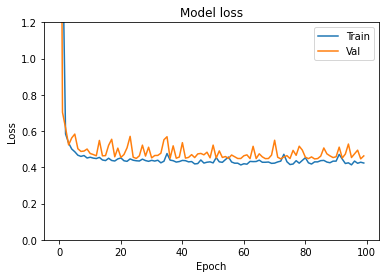

In [23]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

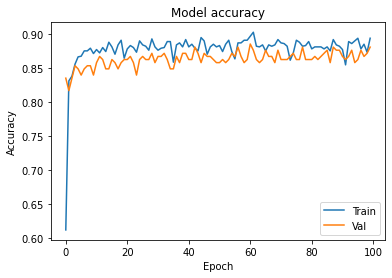

In [24]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()